# Tech Check 2 - Classification
Run the entire code block below. A final model will be created titled ***'final_gbc'***. You will use that final_gbc to predict the unseen data that will be imported for you below. Answer the questions in the quiz. 

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/dolinger-nscc/datasets/main/online_foods.csv')

from pycaret.classification import setup, models, create_model, tune_model, finalize_model, save_model

cls = setup(data, target='Feedback', session_id=42, fix_imbalance=True);

gbc = create_model('gbc');
tuned_gbc =  tune_model(gbc);
final_gbc= finalize_model(tuned_gbc)
final_gbc

,Description,Value
0,Session id,42
1,Target,Feedback
2,Target type,Binary
3,Target mapping,"Negative : 0, Positive: 1"
4,Original data shape,"(330, 12)"
5,Transformed data shape,"(470, 25)"
6,Transformed train set shape,"(370, 25)"
7,Transformed test set shape,"(100, 25)"
8,Numeric features,5
9,Categorical features,6


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9130,0.0000,0.9130,0.9130,0.9130,0.6974,0.6974
1,0.8696,0.0000,0.8696,0.8594,0.8619,0.4964,0.5035
2,0.9565,0.0000,0.9565,0.9587,0.9540,0.8321,0.8441
3,0.9130,0.0000,0.9130,0.9130,0.9130,0.6974,0.6974
4,0.7826,0.0000,0.7826,0.8039,0.7917,0.3114,0.3144
5,0.9130,0.0000,0.9130,0.9130,0.9130,0.7444,0.7444
6,0.8696,0.0000,0.8696,0.8633,0.8641,0.5868,0.5925
7,0.8261,0.0000,0.8261,0.8577,0.7768,0.2812,0.4045
8,0.8261,0.0000,0.8261,0.8579,0.8355,0.5534,0.5677


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,0.0000,0.9565,0.9652,0.9583,0.8623,0.8706
1,0.8696,0.0000,0.8696,0.8594,0.8619,0.4964,0.5035
2,0.9565,0.0000,0.9565,0.9587,0.9540,0.8321,0.8441
3,0.9130,0.0000,0.9130,0.9130,0.9130,0.6974,0.6974
4,0.8696,0.0000,0.8696,0.8594,0.8619,0.4964,0.5035
5,0.9130,0.0000,0.9130,0.9130,0.9130,0.7444,0.7444
6,0.9130,0.0000,0.9130,0.9130,0.9130,0.7444,0.7444
7,0.9565,0.0000,0.9565,0.9588,0.9547,0.8623,0.8706
8,0.8261,0.0000,0.8261,0.8579,0.8355,0.5534,0.5677


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Family size', 'latitude',
                                             'longitude', 'Pin code'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_feat...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.05, loss='log_loss',
                                            max_depth=6, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.3,
                                            min_samples_leaf=4,
                                            min_samples_split=10,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=270,
                                            n_iter_no_change=None,
                                            random_state=42, subsample=0.7,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

## Predictions/ Findings
The unseen data is imported below into the ***'unseen'*** variable. Using yuor final_gbc model above, make predictions on the unseen dataset. As you see in the model above, the target is the 'Feedback' feature.

In [21]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
unseen = pd.read_csv('https://raw.githubusercontent.com/dolinger-nscc/datasets/main/unseen_onlinefoods.csv')
unseen

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
1,24,Male,Single,Student,No Income,Post Graduate,3,13.0487,77.5923,560024,No,Negative
2,25,Male,Single,Employee,10001 to 25000,Graduate,4,13.0166,77.6804,560016,Yes,Positive
3,23,Female,Single,Student,No Income,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive
4,25,Male,Single,Student,No Income,Post Graduate,1,12.9343,77.6044,560029,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
95,23,Male,Single,Student,No Income,Post Graduate,2,12.9442,77.6076,560030,Yes,Positive
96,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
97,26,Female,Single,Employee,More than 50000,Graduate,3,12.9980,77.6227,560005,Yes,Positive
98,24,Female,Single,Self Employeed,25001 to 50000,Post Graduate,3,13.0103,77.5796,560080,No,Negative


In [4]:
cls = final_gbc
unseen_X = unseen.drop('Feedback', axis=1)
y = unseen['Feedback']


In [5]:
unseen_X.shape, y.shape

((100, 11), (100,))

In [6]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()

In [7]:
y_pred = cls.predict(unseen_X)
y_pred

0      Positive
1     Negative 
2      Positive
3      Positive
4      Positive
        ...    
95     Positive
96     Positive
97     Positive
98    Negative 
99    Negative 
Name: Feedback, Length: 100, dtype: object

In [8]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

   Negative        0.60      0.75      0.67        16
    Positive       0.95      0.90      0.93        84

    accuracy                           0.88       100
   macro avg       0.77      0.83      0.80       100
weighted avg       0.89      0.88      0.89       100



In [9]:
y_pred

0      Positive
1     Negative 
2      Positive
3      Positive
4      Positive
        ...    
95     Positive
96     Positive
97     Positive
98    Negative 
99    Negative 
Name: Feedback, Length: 100, dtype: object

In [12]:
accuracy_score(y, y_pred)

0.88

In [13]:
precision_score(y, y_pred, pos_label= 'Positive')

0.95

In [15]:
recall_score(y, y_pred, pos_label= 'Negative ')

0.75

In [16]:
cm = confusion_matrix(y, y_pred)
cm

array([[12,  4],
       [ 8, 76]], dtype=int64)

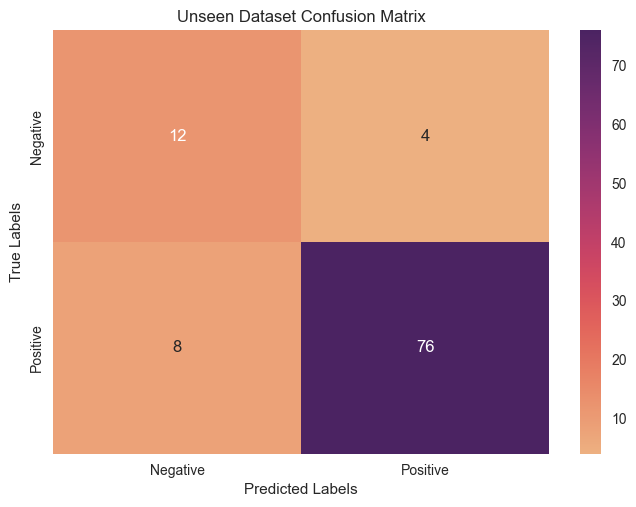

In [22]:
ax= sns.heatmap(cm, annot=True, cmap='flare')
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Unseen Dataset Confusion Matrix');

**From pycaret metrics notebook:**  
 
 **Precision (Positive Predictive Value)**: This is the ratio of the number of true positives divided by the sum of the true positives and the false positives. It shows how many of the positively classified samples are actually positive. It is calculated as:
    $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

 **Accuracy**: This is the ratio of the number of correct predictions to the total number of predictions. It's used when the classes are balanced. It is calculated as:
    $$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

In [ ]:
# 100 rows - 76 were True Positive, 12 were True Negative, 8 were False Negative and 4 were False Positive

In [23]:
precision = 76/(76+4)
precision

0.95

In [24]:
accuracy = (76+12)/100
accuracy

0.88